In [1]:
pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import graphviz
import seaborn as sns
import plotly_express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#データセットの統計量の確認
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#欠損値の確認
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#不要な情報の削除(ID)
df.drop(columns = ['Id'], axis = 1, inplace = True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: xlabel='Species'>

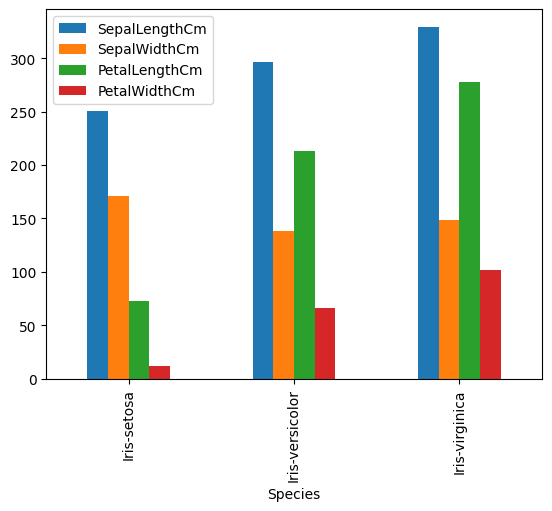

In [8]:
#各特徴量の合計値を図示
df.groupby(['Species']).sum().plot(kind='bar')

In [9]:
#3次元空間で分布を図示
import plotly.express as px
df2 = px.data.iris()
fig = px.scatter_3d(df2, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

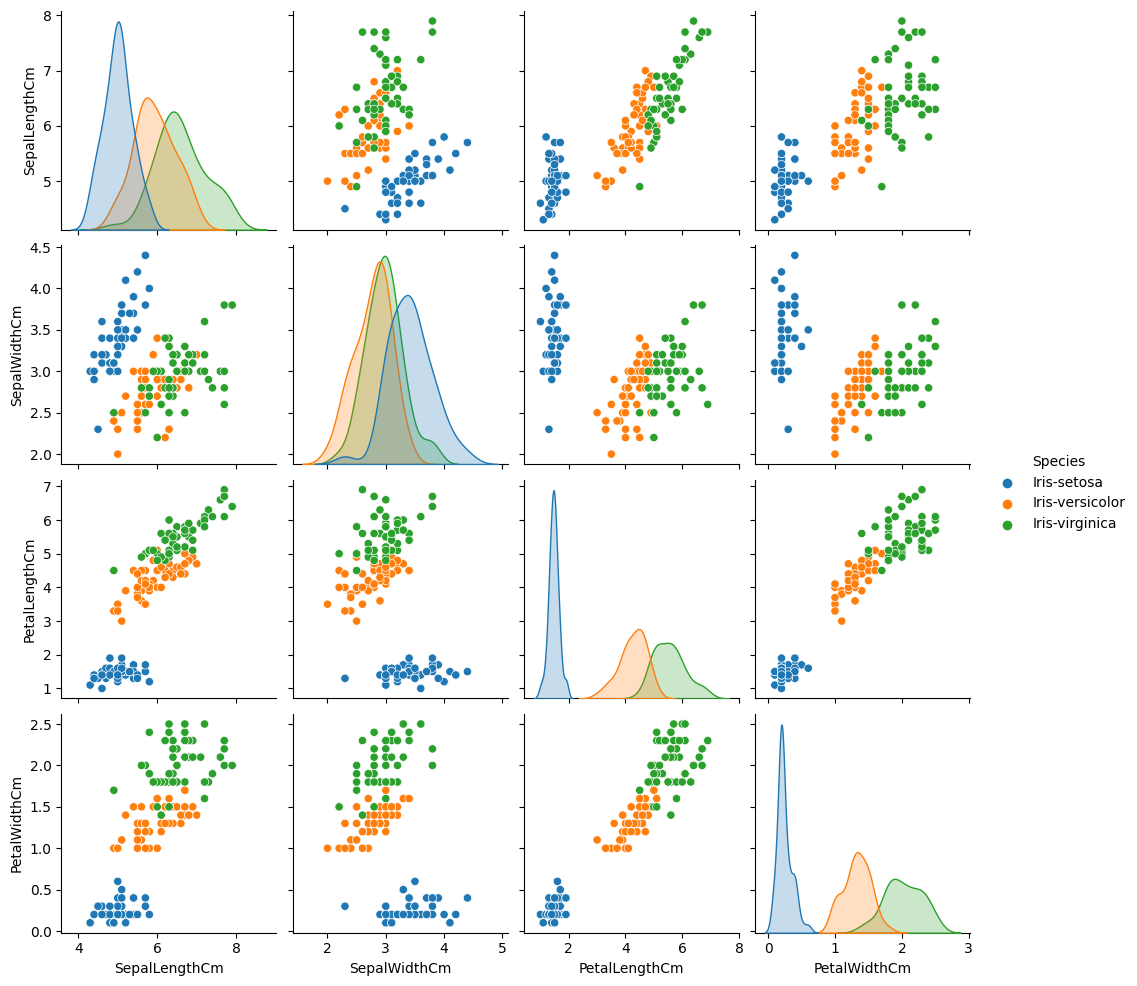

In [10]:
sns.pairplot(df , hue = 'Species')

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

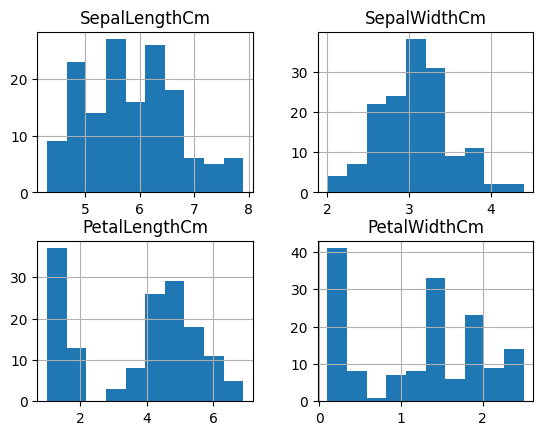

In [11]:
#ヒストグラムを図示
df.hist()

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

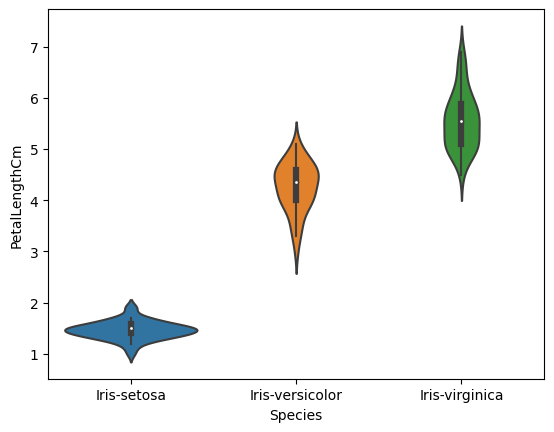

In [12]:
#各特徴量の分布を図示
sns.violinplot(x="Species", y="PetalLengthCm", data=df, size=6)

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

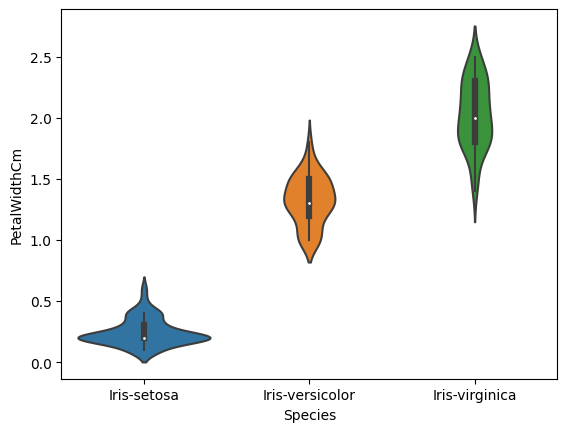

In [13]:
sns.violinplot(x="Species", y="PetalWidthCm", data=df, size=6)

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

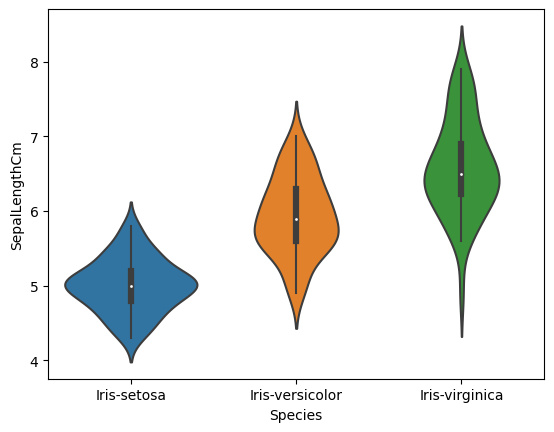

In [14]:
sns.violinplot(x="Species", y="SepalLengthCm", data=df, size=6)

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

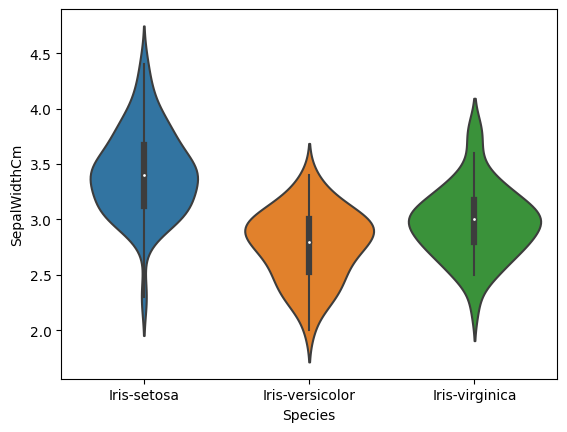

In [15]:
sns.violinplot(x="Species", y="SepalWidthCm", data=df, size=6)

In [46]:
#データセットの分割と加工
X = df.drop('Species', axis = 1)
y = df.Species

In [47]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [48]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [49]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = pd.DataFrame(y)
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [50]:
species_mapping = {index:label for index, label in enumerate(encoder.classes_)}
species_mapping

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state=42)

## Check Shapes of these Sets
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (120, 4)
y_train shape --  (120, 1)
X_test shape --  (30, 4)
y_test shape --  (30, 1)


## (1)決定木での分類

In [52]:
#最大深度3
clf1 = tree.DecisionTreeClassifier(max_depth=3) 
clf1 = clf1.fit(X_train, y_train) 

[Text(0.375, 0.875, 'PetalWidthCm <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]\nclass = y[0]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = y[0]'),
 Text(0.5, 0.625, 'PetalWidthCm <= 1.65\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]\nclass = y[1]'),
 Text(0.25, 0.375, 'PetalLengthCm <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]\nclass = y[1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]\nclass = y[1]'),
 Text(0.375, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = y[2]'),
 Text(0.75, 0.375, 'PetalLengthCm <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]\nclass = y[2]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = y[2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]\nclass = y[2]')]

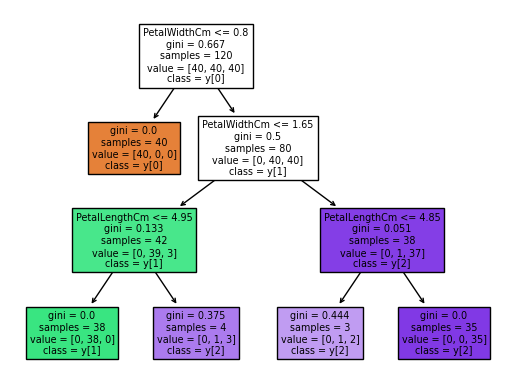

In [53]:
#決定木モデルを可視化
from sklearn.tree import plot_tree
plot_tree(clf1, feature_names=X_train.columns, class_names=True, filled=True)

In [55]:
# 訓練データでの正解率（学習検証）
from sklearn import metrics
predict_train = clf1.predict(X_train)
ac_score1 = metrics.accuracy_score(y_train, predict_train)
print('train score: {0:.2f}%'.format(ac_score1 * 100))

train score: 98.33%


In [56]:
# テストデータでの正解率（モデル検証）
predict_test = clf1.predict(X_test)
ac_score1 = metrics.accuracy_score(y_test, predict_test)
print('test score: {0:.2f}%'.format(ac_score1 * 100))

test score: 96.67%


In [57]:
#最大深度4
clf2 = tree.DecisionTreeClassifier(max_depth=4) 
clf2 = clf2.fit(X_train, y_train) 

[Text(0.4, 0.9, 'PetalWidthCm <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]\nclass = y[0]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = y[0]'),
 Text(0.5, 0.7, 'PetalWidthCm <= 1.65\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]\nclass = y[1]'),
 Text(0.2, 0.5, 'PetalLengthCm <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]\nclass = y[1]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]\nclass = y[1]'),
 Text(0.3, 0.3, 'SepalWidthCm <= 2.75\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = y[2]'),
 Text(0.2, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = y[1]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = y[2]'),
 Text(0.8, 0.5, 'PetalLengthCm <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]\nclass = y[2]'),
 Text(0.7, 0.3, 'SepalWidthCm <= 3.0\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = y[2]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = y[2

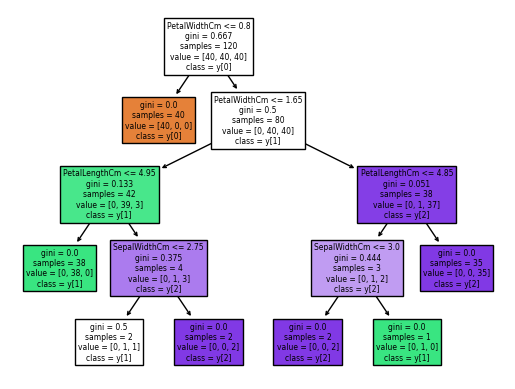

In [58]:
#決定木モデルを可視化
plot_tree(clf2, feature_names=X_train.columns, class_names=True, filled=True)

In [59]:
# 訓練データでの正解率（学習検証）
predict_train = clf2.predict(X_train)
ac_score2 = metrics.accuracy_score(y_train, predict_train)
print('train score: {0:.2f}%'.format(ac_score2 * 100))

train score: 99.17%


In [60]:
# テストデータでの正解率（モデル検証）
predict_test = clf2.predict(X_test)
ac_score2 = metrics.accuracy_score(y_test, predict_test)
print('test score: {0:.2f}%'.format(ac_score2 * 100))

test score: 93.33%


最大深度4の場合は3の場合に比べて訓練データでのスコアはいいが,テストデータでのスコアは悪くなっている→**過学習**

## (2)ランダムフォレストでの分類

In [94]:
clf3 = RandomForestClassifier(random_state=1234)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=1234)

In [95]:
# 訓練データでの正解率（学習検証）
predict_train = clf3.predict(X_train)
ac_score3 = metrics.accuracy_score(y_train, predict_train)
print('train score: {0:.2f}%'.format(ac_score3 * 100))

train score: 100.00%


In [97]:
# テストデータでの正解率（モデル検証）
predict_test = clf3.predict(X_test)
ac_score3 = metrics.accuracy_score(y_test, predict_test)
print('test score: {0:.2f}%'.format(ac_score3 * 100))

test score: 96.67%


## k-means法での分類

In [113]:
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_pred_train = kmeans.fit_predict(X_train)
cluster_pred_test = kmeans.fit_predict(X_test)

In [111]:
# 訓練データでの正解率（学習検証）
predict_train = cluster_pred_train
ac_score3 = metrics.accuracy_score(y_train, predict_train)
print('train score: {0:.2f}%'.format(ac_score3 * 100))

train score: 89.17%


In [112]:
# テストデータでの正解率（モデル検証）
predict_test = cluster_pred_test
ac_score3 = metrics.accuracy_score(y_test, predict_test)
print('test score: {0:.2f}%'.format(ac_score3 * 100))

test score: 53.33%
